In [1]:
# Argparse
import argparse
opt = argparse.Namespace( # Fake parsed arguments
    seed=3,
    device=-1,
    cuda=False,
    visdom=True
)

# Util
import cdae.util as util
util.init(opt)

# Model
import cdae.models.quadratic as quadratic

# Training
import cdae.train as train


# Torch
import torch
from torch.autograd import Variable

# Plotting
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.available
plt.style.use('seaborn-whitegrid')

%matplotlib notebook

# Stats
import scipy.stats

# Setup

## True Generative Model

The true generative model $p$ over latents $k, x$ and observed variables $y$ is:
\begin{align}
    k &\sim \mathrm{Categorical}([2, 5], [0.5, 0.5]) \\\
    x &\sim \mathrm{Normal}(0, 1) \\\
    y &\sim \mathrm{Normal}(f(k, x) ,1)
\end{align}
where $f: \mathbb R^2 \to \mathbb R$ is defined as
\begin{align}
    f(k, x) = a(k + x)^2 + b(k + x) + c.
\end{align}

## Generative Network

Assume that we actually don't know the form of $f$ and that we want to learn it, i.e. the true model $p$ from a dataset $(y^{(n)})_{n = 1}^N$.
Let's model the family of functions $f$ under consideration as a neural network parameterized by generative weights $\theta$ such that it maps from $\mathbb R^2$ to $\mathbb R$.

## Inference Network

We seek to learn an inference network $q_{\phi}(k, x \lvert y)$ parameterized by $\phi$ which, given $y$ maps to the parameters of the distribution over $(k, x)$, ideally close to the posterior under the true model, $p(k, x \lvert y)$.

Let
\begin{align}
    q_{\phi}(k, x \lvert y) &= q_{\phi}(k \lvert y) q_{\phi}(x \lvert k, y) \\\
    q_{\phi}(k \lvert y) &= \mathrm{Categorical}([2, 5], [\phi_1, \phi_2]) \\\
    q_{\phi}(x \lvert k, y) &= \mathrm{Normal}(\phi_3, \phi_4)
\end{align}
where $\phi = [\phi_1, \dotsc, \phi_4]$ is the output of the inference network.

<IPython.core.display.Javascript object>


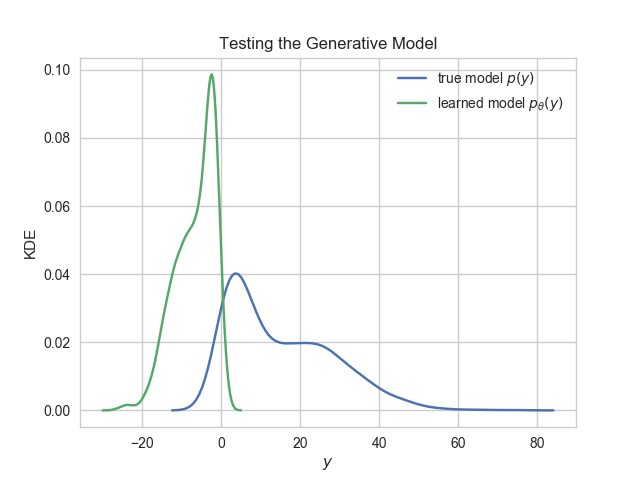

<IPython.core.display.Javascript object>


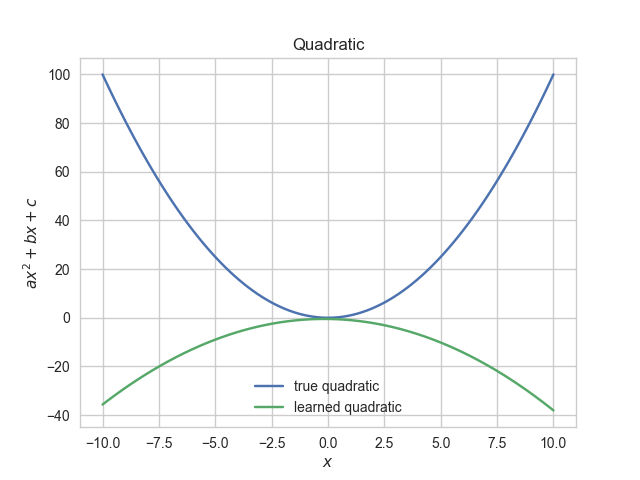

<IPython.core.display.Javascript object>


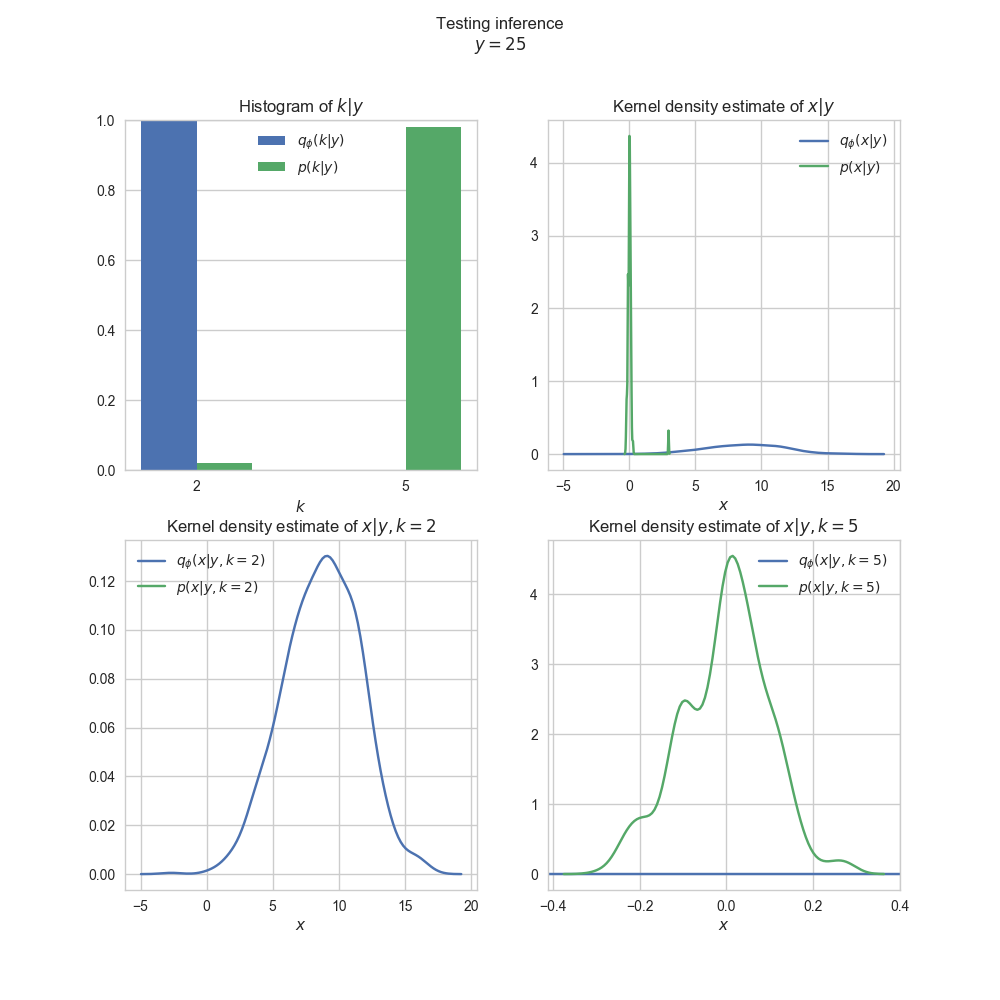

/Users/tuananhle/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/tuananhle/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [2]:
generative_model = quadratic.QuadraticGenerativeModel(a=1, b=0, c=0)
generative_network = quadratic.QuadraticGenerativeNetwork()
inference_network = quadratic.QuadraticInferenceNetwork()

quadratic.plot_quadratic_generative_comparison(
    generative_model,
    generative_network,
    num_data=1000,
    filename='./figures/generative_start.pdf'
)

quadratic.plot_quadratic_comparison(
    generative_model,
    generative_network,
    filename='./figures/quadratic_start.pdf'
)

quadratic.plot_quadratic_inference_comparison(
    generative_model,
    inference_network,
    num_inference_network_samples=1000,
    num_importance_particles=1000,
    y_test=25,
    filename='./figures/inference_start.pdf'
)

# Training Loop

2017-07-27 17:55:27,262: Iteration 0
2017-07-27 17:55:27,315: Generative network step | Epoch 0 | Objective -1866.5043089752198
2017-07-27 17:55:27,372: Generative network step | Epoch 1 | Objective -1912.2025464782714
2017-07-27 17:55:27,504: Generative network step | Epoch 2 | Objective -1847.9017768707276
2017-07-27 17:55:27,553: Generative network step | Epoch 3 | Objective -1913.6046291809082
2017-07-27 17:55:27,603: Generative network step | Epoch 4 | Objective -1849.749732788086
2017-07-27 17:55:27,648: Generative network step | Epoch 5 | Objective -1819.3623683776855
2017-07-27 17:55:27,701: Generative network step | Epoch 6 | Objective -1849.4310945739746
2017-07-27 17:55:27,745: Generative network step | Epoch 7 | Objective -1845.9503397521974
2017-07-27 17:55:27,790: Generative network step | Epoch 8 | Objective -1837.05833694458
2017-07-27 17:55:27,842: Generative network step | Epoch 9 | Objective -1836.8808037109375
2017-07-27 17:55:27,892: Generative network step | Epoch

2017-07-27 17:55:32,409: Generative network step | Epoch 10 | Objective -699.7876643981933
2017-07-27 17:55:32,454: Generative network step | Epoch 11 | Objective -715.5628720092774
2017-07-27 17:55:32,503: Generative network step | Epoch 12 | Objective -713.2757606506348
2017-07-27 17:55:32,548: Generative network step | Epoch 13 | Objective -700.4527749481201
2017-07-27 17:55:32,593: Generative network step | Epoch 14 | Objective -687.2251980743408
2017-07-27 17:55:32,641: Generative network step | Epoch 15 | Objective -721.3815299377442
2017-07-27 17:55:32,685: Generative network step | Epoch 16 | Objective -711.9529400634766
2017-07-27 17:55:32,733: Generative network step | Epoch 17 | Objective -701.014722442627
2017-07-27 17:55:32,786: Generative network step | Epoch 18 | Objective -690.27800680542
2017-07-27 17:55:32,831: Generative network step | Epoch 19 | Objective -703.7461814422608
2017-07-27 17:55:32,874: Generative network step | Epoch 20 | Objective -744.9392729797363
20

2017-07-27 17:55:37,346: Generative network step | Epoch 21 | Objective -390.0281137390137
2017-07-27 17:55:37,389: Generative network step | Epoch 22 | Objective -400.3249533996582
2017-07-27 17:55:37,436: Generative network step | Epoch 23 | Objective -389.01235618591306
2017-07-27 17:55:37,479: Generative network step | Epoch 24 | Objective -377.68090629577637
2017-07-27 17:55:37,527: Generative network step | Epoch 25 | Objective -392.79539044189454
2017-07-27 17:55:37,574: Generative network step | Epoch 26 | Objective -404.9249076538086
2017-07-27 17:55:37,672: Generative network step | Epoch 27 | Objective -397.4411799468994
2017-07-27 17:55:37,718: Generative network step | Epoch 28 | Objective -401.9993774719238
2017-07-27 17:55:37,764: Generative network step | Epoch 29 | Objective -384.47768133544923
2017-07-27 17:55:37,808: Generative network step | Epoch 30 | Objective -385.4178685760498
2017-07-27 17:55:37,853: Generative network step | Epoch 31 | Objective -393.968912597

2017-07-27 17:55:42,300: Generative network step | Epoch 32 | Objective -368.4313337402344
2017-07-27 17:55:42,351: Generative network step | Epoch 33 | Objective -362.2818762512207
2017-07-27 17:55:42,396: Generative network step | Epoch 34 | Objective -371.11856294250487
2017-07-27 17:55:42,446: Generative network step | Epoch 35 | Objective -366.8321692352295
2017-07-27 17:55:42,492: Generative network step | Epoch 36 | Objective -375.6217223510742
2017-07-27 17:55:42,600: Generative network step | Epoch 37 | Objective -366.8106844329834
2017-07-27 17:55:42,645: Generative network step | Epoch 38 | Objective -367.7878307952881
2017-07-27 17:55:42,689: Generative network step | Epoch 39 | Objective -377.46270372009275
2017-07-27 17:55:42,736: Inference network step | Epoch 0 | Objective 1.285149262867868
2017-07-27 17:55:42,808: Inference network step | Epoch 1 | Objective 1.309908137626946
2017-07-27 17:55:42,868: Inference network step | Epoch 2 | Objective 1.2708872616589069
2017-

2017-07-27 17:55:47,592: Inference network step | Epoch 3 | Objective 1.1632907751314343
2017-07-27 17:55:47,658: Inference network step | Epoch 4 | Objective 1.1710331275612116
2017-07-27 17:55:47,726: Inference network step | Epoch 5 | Objective 1.2119726715292782
2017-07-27 17:55:47,804: Inference network step | Epoch 6 | Objective 1.222587355831638
2017-07-27 17:55:47,879: Inference network step | Epoch 7 | Objective 1.1988703761473298
2017-07-27 17:55:47,957: Inference network step | Epoch 8 | Objective 1.164165827864781
2017-07-27 17:55:48,032: Inference network step | Epoch 9 | Objective 1.155651945522055
2017-07-27 17:55:48,101: Inference network step | Epoch 10 | Objective 1.1180985509548336
2017-07-27 17:55:48,164: Inference network step | Epoch 11 | Objective 1.2033211736585945
2017-07-27 17:55:48,229: Inference network step | Epoch 12 | Objective 1.217066487884149
2017-07-27 17:55:48,294: Inference network step | Epoch 13 | Objective 1.1917148441951722
2017-07-27 17:55:48,3

2017-07-27 17:55:53,626: Inference network step | Epoch 14 | Objective 1.1354933654721826
2017-07-27 17:55:53,691: Inference network step | Epoch 15 | Objective 1.1565246088448913
2017-07-27 17:55:53,764: Inference network step | Epoch 16 | Objective 1.1629253914058209
2017-07-27 17:55:53,830: Inference network step | Epoch 17 | Objective 1.1386721359398215
2017-07-27 17:55:53,898: Inference network step | Epoch 18 | Objective 1.0651639255639165
2017-07-27 17:55:53,965: Inference network step | Epoch 19 | Objective 1.128599342804402
2017-07-27 17:55:54,036: Inference network step | Epoch 20 | Objective 1.1414979767641054
2017-07-27 17:55:54,098: Inference network step | Epoch 21 | Objective 1.049030968554318
2017-07-27 17:55:54,165: Inference network step | Epoch 22 | Objective 1.1141920781061054
2017-07-27 17:55:54,229: Inference network step | Epoch 23 | Objective 1.1301438838960602
2017-07-27 17:55:54,296: Inference network step | Epoch 24 | Objective 1.0767913651037961
2017-07-27 1

2017-07-27 17:55:59,554: Inference network step | Epoch 25 | Objective 1.161992439075373
2017-07-27 17:55:59,620: Inference network step | Epoch 26 | Objective 1.1542081276248208
2017-07-27 17:55:59,696: Inference network step | Epoch 27 | Objective 1.096511545433197
2017-07-27 17:55:59,762: Inference network step | Epoch 28 | Objective 1.1720101157384926
2017-07-27 17:55:59,837: Inference network step | Epoch 29 | Objective 1.1538093432355672
2017-07-27 17:55:59,903: Inference network step | Epoch 30 | Objective 1.1483487643254922
2017-07-27 17:55:59,973: Inference network step | Epoch 31 | Objective 1.1551012029796839
2017-07-27 17:56:00,053: Inference network step | Epoch 32 | Objective 1.145806168329902
2017-07-27 17:56:00,132: Inference network step | Epoch 33 | Objective 1.1729855289172846
2017-07-27 17:56:00,204: Inference network step | Epoch 34 | Objective 1.1229538413467817
2017-07-27 17:56:00,277: Inference network step | Epoch 35 | Objective 1.1348383537437767
2017-07-27 17

2017-07-27 17:56:05,762: Inference network step | Epoch 36 | Objective 1.3996556330025196
2017-07-27 17:56:05,836: Inference network step | Epoch 37 | Objective 1.3263663366436957
2017-07-27 17:56:05,909: Inference network step | Epoch 38 | Objective 1.379247953683138
2017-07-27 17:56:05,978: Inference network step | Epoch 39 | Objective 1.3656652549803256
2017-07-27 17:56:05,979: Iteration 8
2017-07-27 17:56:06,066: Generative network step | Epoch 0 | Objective -1416.9689671936035
2017-07-27 17:56:06,136: Generative network step | Epoch 1 | Objective -1402.3601924743652
2017-07-27 17:56:06,204: Generative network step | Epoch 2 | Objective -1351.6807202453613
2017-07-27 17:56:06,261: Generative network step | Epoch 3 | Objective -1338.3441744995116
2017-07-27 17:56:06,320: Generative network step | Epoch 4 | Objective -1323.695551940918
2017-07-27 17:56:06,377: Generative network step | Epoch 5 | Objective -1279.7699272766113
2017-07-27 17:56:06,496: Generative network step | Epoch 6 

2017-07-27 17:56:11,634: Generative network step | Epoch 7 | Objective -541.2138551635742
2017-07-27 17:56:11,686: Generative network step | Epoch 8 | Objective -536.1131795043946
2017-07-27 17:56:11,739: Generative network step | Epoch 9 | Objective -525.5928307189942
2017-07-27 17:56:11,797: Generative network step | Epoch 10 | Objective -521.9064341278076
2017-07-27 17:56:11,852: Generative network step | Epoch 11 | Objective -515.3648150024414
2017-07-27 17:56:11,912: Generative network step | Epoch 12 | Objective -508.0956521759033
2017-07-27 17:56:11,964: Generative network step | Epoch 13 | Objective -501.66531674194334
2017-07-27 17:56:12,023: Generative network step | Epoch 14 | Objective -488.9338879547119
2017-07-27 17:56:12,084: Generative network step | Epoch 15 | Objective -475.8092515563965
2017-07-27 17:56:12,140: Generative network step | Epoch 16 | Objective -475.9831067199707
2017-07-27 17:56:12,199: Generative network step | Epoch 17 | Objective -464.9001831359863
2

<IPython.core.display.Javascript object>


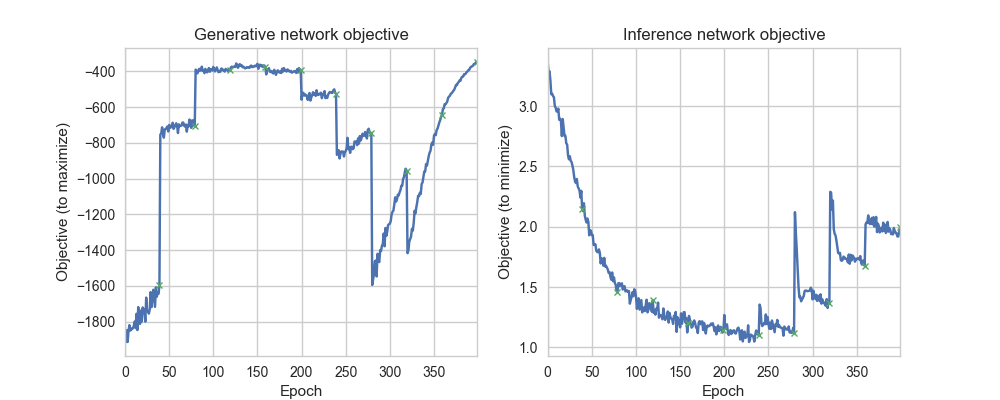

In [3]:
generative_network_objective, inference_network_objective, num_generative_epochs, num_inference_epochs = train.train_cdae(
    generative_model,
    generative_network,
    inference_network,
    num_iterations=10,
    batch_size=1000,
    num_data=1000,
    generative_epochs_per_iteration=40,
    inference_epochs_per_iteration=40
)
train.plot_cdae_train(
    generative_network_objective,
    inference_network_objective,
    num_generative_epochs,
    num_inference_epochs,
    filename='./figures/training.pdf'
)

# Testing Performance

<IPython.core.display.Javascript object>


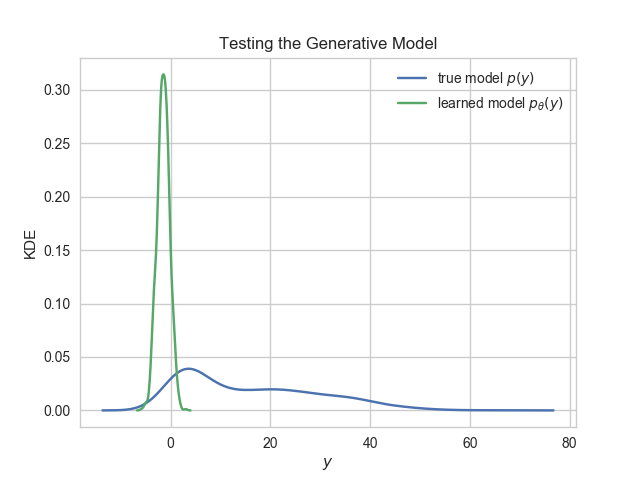

<IPython.core.display.Javascript object>


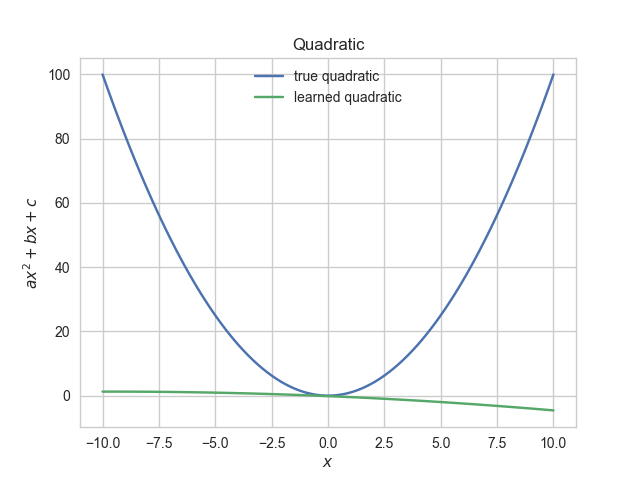

<IPython.core.display.Javascript object>


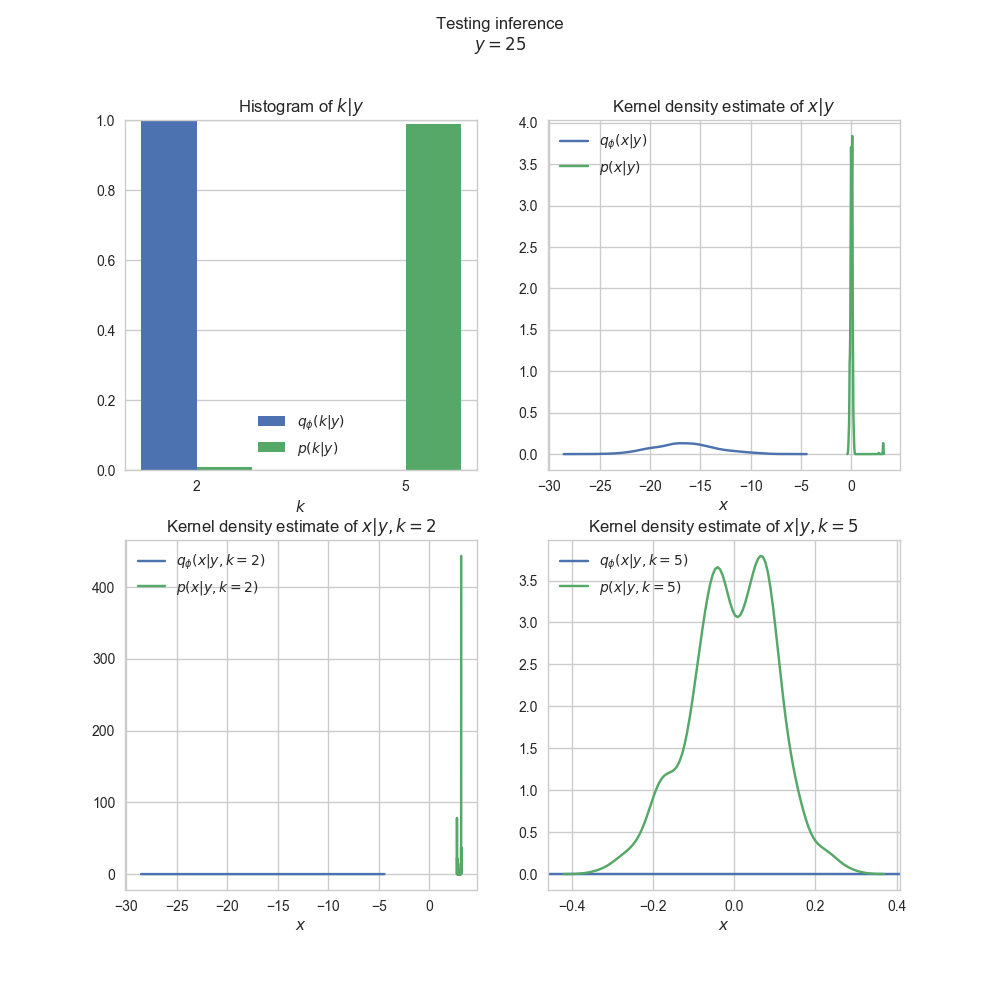

In [4]:
quadratic.plot_quadratic_generative_comparison(
    generative_model,
    generative_network,
    num_data=1000,
    filename='./figures/generative.pdf'
)

quadratic.plot_quadratic_comparison(
    generative_model,
    generative_network,
    filename='./figures/quadratic.pdf'
)

quadratic.plot_quadratic_inference_comparison(
    generative_model,
    inference_network,
    num_inference_network_samples=1000,
    num_importance_particles=1000,
    y_test=25,
    filename='./figures/inference.pdf'
)